# Bankruptcy Prediction 

### Using Qualitative Bankruptcy data

Raja Sekar S (19381045) 

## Contents  
<ol>
    <b><li>Importing libraries</li></b>
    <li><b>Importing and organizing the data</b>
        <ol>
            <li>Data Information</li>
            <li>Rename Column</li>
            <li>Data Preparation</li>
        </ol>
    </li>
    <li><b>Data Analysis and Preprocessing</b>
        <ol>
            <li>Missing Data Analysis</li>
            <li>Imbalanced data</li>
            <li>EDA</li>               
        </ol>
    </li>
    <li><b>Stratified Cross Validation Splitting</b>
    </li>               
    <li><b>Data Models</b>
        <ol>
                    <li>Logistic Regression classifier</li>
                    <li>Support Vector Machine</li>
                    <li>Gaussian Naive Bayes classifier</li>
                    <li>Decision Tree classifier</li>
                    <li>Random Forest classifier</li>
                    <li>Extreme Gradient Boosting classifier</li>
                    <li>Balanced Bagging classifier</li>            
         </ol>
    </li>
    <li><b>Model Analysis</b>
    </li>
    <li><b>Ensemble Blender</b>
    </li>
    <li><b>Summary</b>
    </li>
</ol>

## 1. Importing libraries

In [1]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# For loading .arff files
from scipy.io import arff
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict

# Impoting classification models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE 
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Train-test-split

from sklearn.model_selection import train_test_split

## 2. Importing and organizing the data

<b>Dataset Link:</b>The Dataset can be found at [Qualitative bankruptcy dataset](https://archive.ics.uci.edu/ml/datasets/Qualitative_Bankruptcy)

In [2]:
#Load CSV file
df = pd.read_csv("QB.csv")

# Printing out the first 5 rows of the dataframe

print (df.head())
print (df.shape)

  Industrial Risk Management Risk Financial Flexibility Credibility  \
0               P               P                     A           A   
1               N               N                     A           A   
2               A               A                     A           A   
3               P               P                     P           P   
4               N               N                     P           P   

  Competitiveness Operating Risk Class  
0               A              P    NB  
1               A              N    NB  
2               A              A    NB  
3               P              P    NB  
4               P              N    NB  
(250, 7)


### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    object
 1   Management Risk        250 non-null    object
 2   Financial Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [4]:
df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [5]:
print(df['Class'].value_counts())

NB    143
B     107
Name: Class, dtype: int64


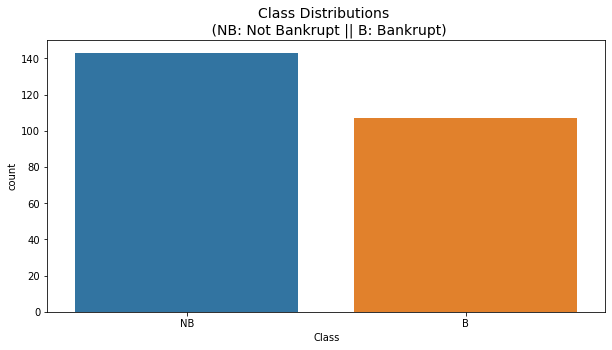

In [6]:
# Checking labels distributions
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.countplot(df['Class'])
plt.title('Class Distributions \n (NB: Not Bankrupt || B: Bankrupt)', fontsize=14)
plt.show()

### Column Rename 

In [7]:
# Set the column headers from X1 ... X6 and the class label as Y, for dataframe.
def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes.columns)-1)]
    cols.append('Y')
    dataframes.columns = cols

set_new_headers(df)

# print the first 5 rows of a dataset
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


### Data Preparation

#### Convert the class label types to int
If we look the class label `X`, we notice that the values are shown either as `'P'` or `'A'` or `'N'`   
They actually correspond to factor being Positive, Average, and Negative respectively.   
It is convenient to convert them to binary integers 1,2 and 3 respectively.

If we look the class label `Y`, we notice that the values are shown either as `'NB'` or `'B'`   
They actually correspond to bankruptcy being Not Bankrupt and Bankrupt respectively.   
It is convenient to convert them to binary integers 0 and 1 respectively.

### Encoding

#### Ordinal Encoding

In [8]:
# create dictionary of ordinal to integer mapping

ordinal_dictionnary = { 'N':3, 'A':2, 'P':1 }

# apply using map

df['X1'] = df['X1'].map(ordinal_dictionnary)
df['X2'] = df['X2'].map(ordinal_dictionnary)
df['X3'] = df['X3'].map(ordinal_dictionnary)
df['X4'] = df['X4'].map(ordinal_dictionnary)
df['X5'] = df['X5'].map(ordinal_dictionnary)
df['X6'] = df['X6'].map(ordinal_dictionnary)

print (df.head)

<bound method NDFrame.head of      X1  X2  X3  X4  X5  X6   Y
0     1   1   2   2   2   1  NB
1     3   3   2   2   2   3  NB
2     2   2   2   2   2   2  NB
3     1   1   1   1   1   1  NB
4     3   3   1   1   1   3  NB
..   ..  ..  ..  ..  ..  ..  ..
245   3   3   2   3   3   3   B
246   1   3   3   3   3   3   B
247   2   3   3   3   3   3   B
248   3   3   3   3   3   3   B
249   1   3   3   3   2   2   B

[250 rows x 7 columns]>


#### Binary Encoding

In [9]:
df['Y'] = df['Y'].replace({'B':1, 'NB':0})

print (df.head)

<bound method NDFrame.head of      X1  X2  X3  X4  X5  X6  Y
0     1   1   2   2   2   1  0
1     3   3   2   2   2   3  0
2     2   2   2   2   2   2  0
3     1   1   1   1   1   1  0
4     3   3   1   1   1   3  0
..   ..  ..  ..  ..  ..  .. ..
245   3   3   2   3   3   3  1
246   1   3   3   3   3   3  1
247   2   3   3   3   3   3  1
248   3   3   3   3   3   3  1
249   1   3   3   3   2   2  1

[250 rows x 7 columns]>


## 3. Data Analysis and Preprocessing

### 3.A Missing Data Analysis
Surely, there is missing data. Let us now see how much of it is missing

In [10]:
# detect the missing values
df.isna()
count = df.isna().sum()
count

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

The above step shows us that there are no missing data. 

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

### 3.B Imbalanced data   

We have not dealt with the class imbalance (if any) in the data. Simply put, Data Imbalance is a condition where the samples belonging to one or more 'majority' class labels of a labelled dataset heavily outnumber the sample belonging to the other 'minority' classes.   

Data imbalance critically affects the modeling as the models won't have sufficient data belonging to minority classes to train on and this leads to biased models, ultimately leading to poor performance on test data.   

Firstly, let us see if our data is imbalanced, and to what extent.

In [11]:
print('Qualitative Bankruptcy Data')
print(df.groupby('Y').size())
minority_percent = (df['Y'].tolist().count(1) / len(df['Y'].tolist()))*100
print('(label 1) percentage: '+  str(minority_percent) + '%')
print('Minority (label 1) percentage: '+  str(50-minority_percent) + '%')
        

Qualitative Bankruptcy Data
Y
0    143
1    107
dtype: int64
(label 1) percentage: 42.8%
Minority (label 1) percentage: 7.200000000000003%


We have seen in the step above that there is not a lot of data imbalance for our datasets, as indicated by the percentage of minority class (label `1`) samples among their datasets. 

### 3.C Exploratory Data Analysis (EDA)

Let's explore our dataset to gain as much information as possible from several types of visualizations. A first general plot to show is the correlation heatmap that plots all the correlations (linear and non, depending on the the selected test: Pearson or Spearman) among numerical variables of the dataset. Knowing the correlations among features is an important step in deciding which features to maintain during training.

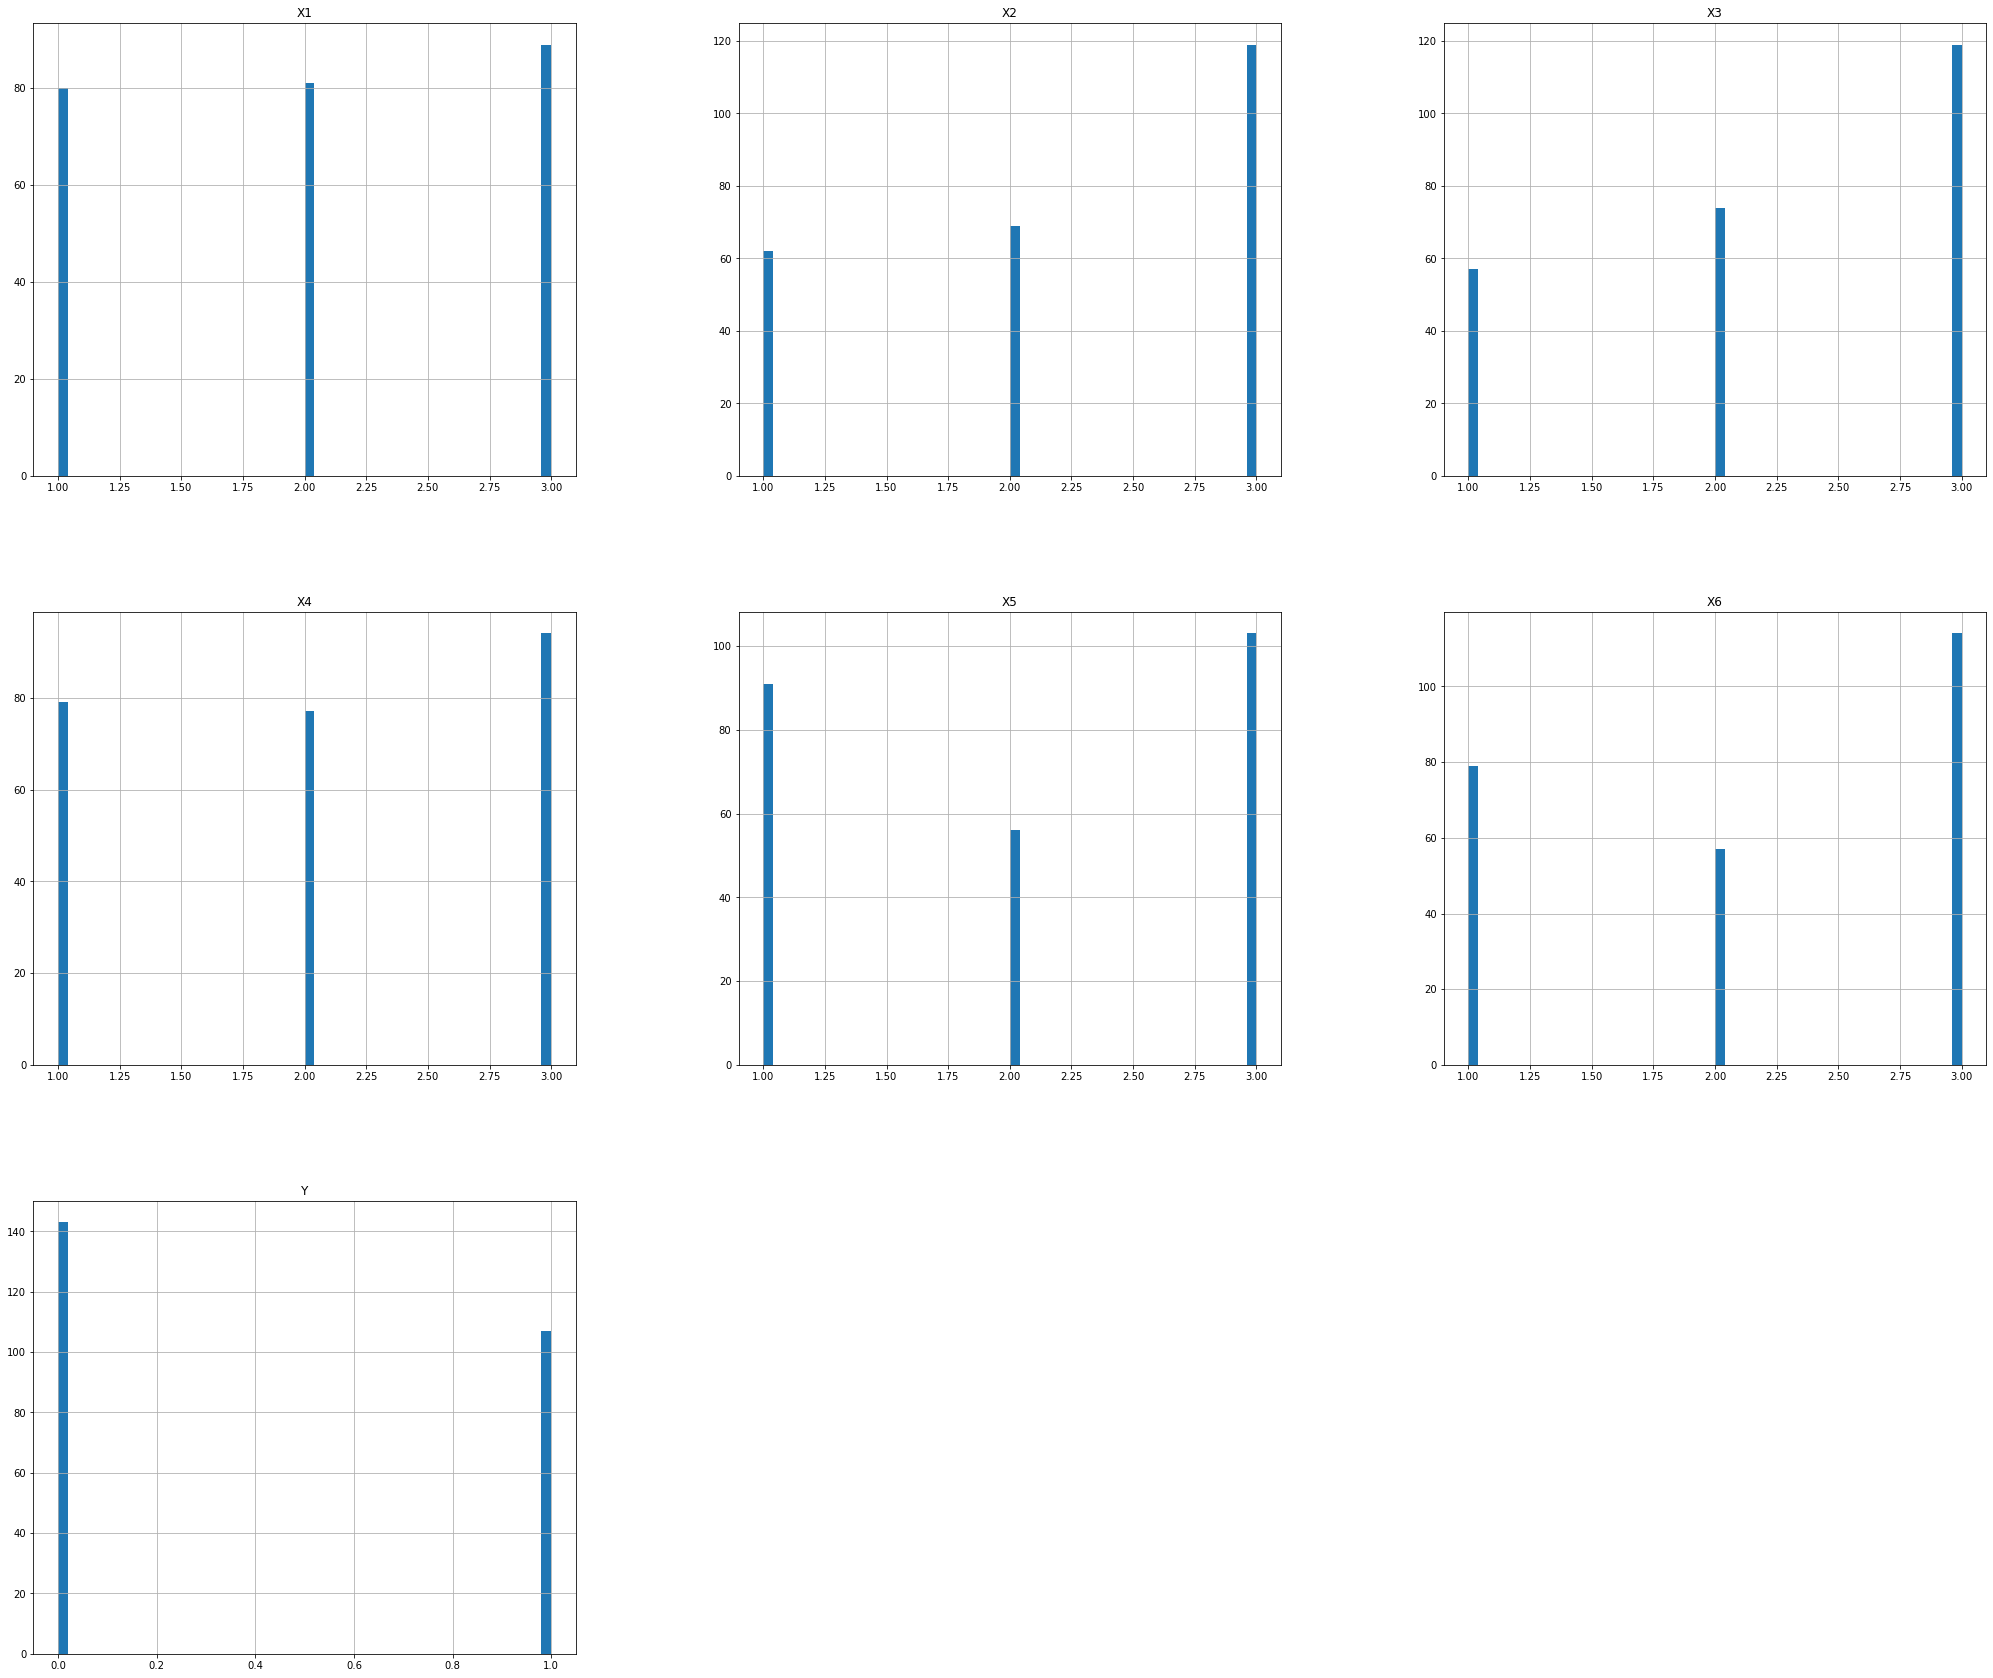

In [12]:
# Looking at the histograms of numerical data

df.hist(figsize = (35,30), bins = 50)
plt.show()

### Pearson Correlation Matrix

In [13]:
def pearson_corr(size_x,size_y,dataframe,correlation_target,correlation_minimum_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.corr(method="pearson")
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    relevant_features = target[target>correlation_minimum_criteria]
    print(relevant_features)

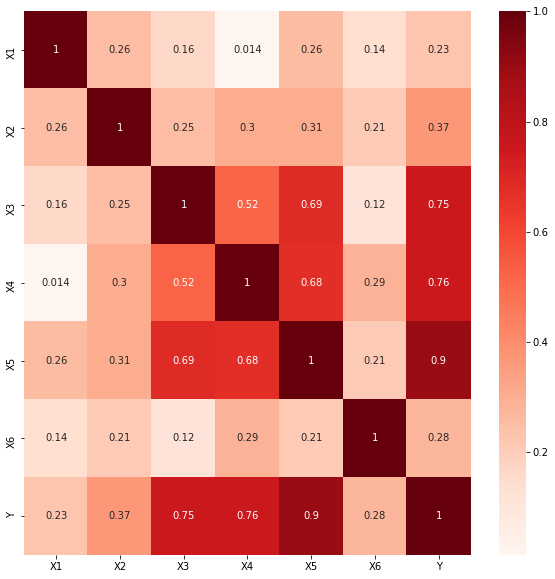

X3    0.751020
X4    0.755909
X5    0.899452
Y     1.000000
Name: Y, dtype: float64


In [14]:
pearson_corr(10,10,df,'Y',0.5)

### Spearman Correlation

In [15]:
def spearman_corr(size_x,size_y,dataframe,correlation_target,correlation_minimum_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.corr(method="spearman")
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    relevant_features = target[target>correlation_minimum_criteria]
    print(relevant_features)

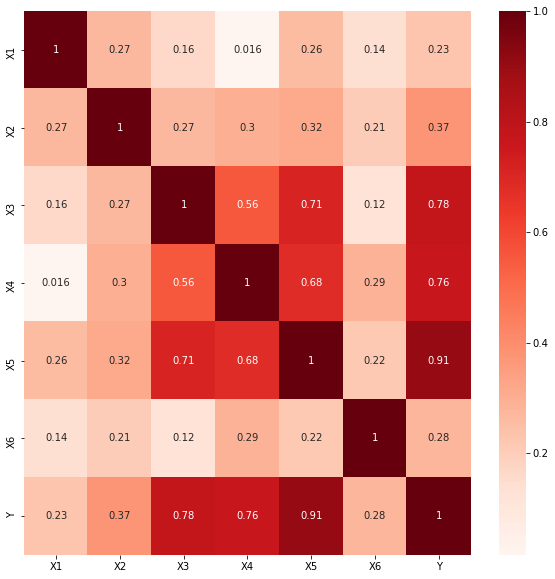

X3    0.782953
X4    0.761855
X5    0.905999
Y     1.000000
Name: Y, dtype: float64


In [16]:
spearman_corr(10,10,df,'Y',0.5)

Based on the Pearson correlation's matrix and Spearman correlation's matrix , we see that  
X3 = Financial Flexibility, 
X4 = Credibility 
X5 = Competitiveness 
have the highest correlation with the Y.

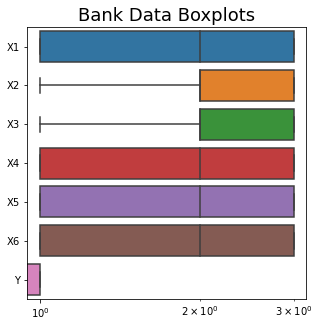

In [17]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (5,5))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

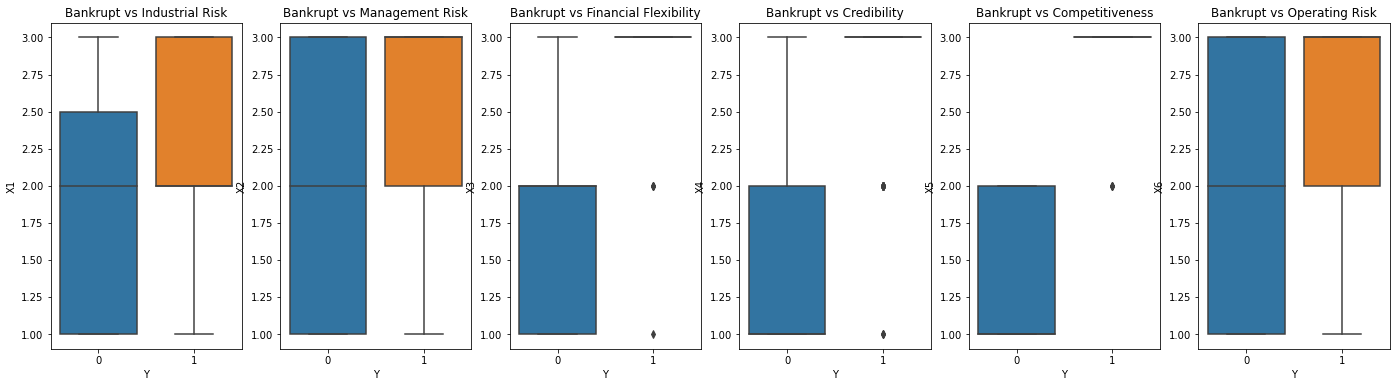

In [18]:
# Plotting interesting features

f, axes = plt.subplots(ncols=6, figsize=(24,6))

sns.boxplot(x='Y', y='X1', data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs Industrial Risk')

sns.boxplot(x='Y', y='X2', data=df, ax=axes[1])
axes[1].set_title('Bankrupt vs Management Risk')

sns.boxplot(x='Y', y='X3', data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs Financial Flexibility')

sns.boxplot(x='Y', y='X4', data=df, ax=axes[3])
axes[3].set_title('Bankrupt vs Credibility')

sns.boxplot(x='Y', y='X5', data=df, ax=axes[4])
axes[4].set_title('Bankrupt vs Competitiveness')


sns.boxplot(x='Y', y='X6', data=df, ax=axes[5])
axes[5].set_title('Bankrupt vs Operating Risk')



plt.show()

Now, let's look at the distribution of these features for companies that are close to bankruptcy:

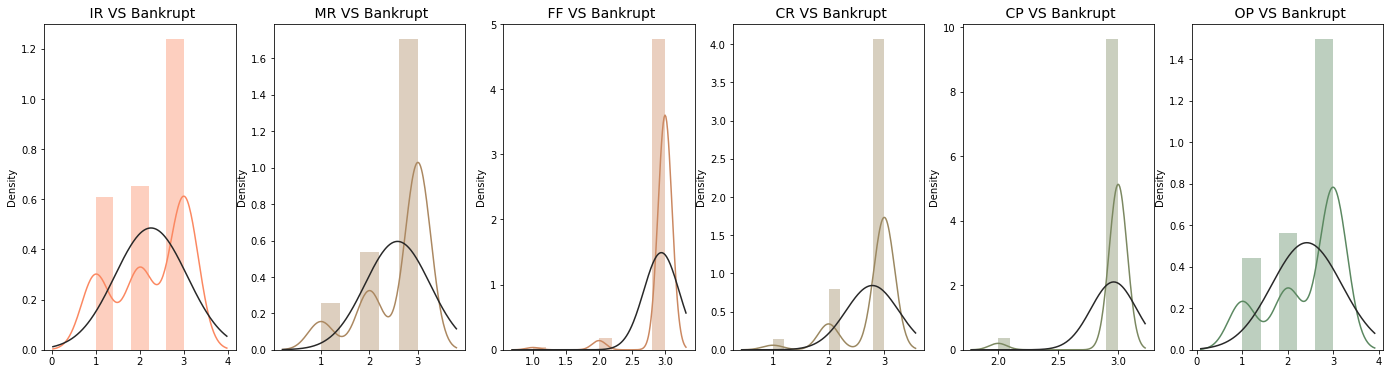

In [19]:
# Plotting the feature distributions for close to bankrputcy companies
from scipy.stats import norm
from collections import Counter
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(24, 6))

IR = df['X1'].loc[df['Y'] == 1].values
sns.distplot(IR,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' IR VS Bankrupt', fontsize=14)

MR = df['X2'].loc[df['Y'] == 1].values
sns.distplot(MR,ax=ax2, fit=norm, color='#AB8861')
ax2.set_title(' MR VS Bankrupt', fontsize=14)

FF = df['X3'].loc[df['Y'] == 1].values
sns.distplot(FF,ax=ax3, fit=norm, color='#CB8861')
ax3.set_title(' FF VS Bankrupt', fontsize=14)

CR = df['X4'].loc[df['Y'] == 1].values
sns.distplot(CR,ax=ax4, fit=norm, color='#9B8861')
ax4.set_title(' CR VS Bankrupt', fontsize=14)

CP = df['X5'].loc[df['Y'] == 1].values
sns.distplot(CP,ax=ax5, fit=norm, color='#7B8861')
ax5.set_title(' CP VS Bankrupt', fontsize=14)

OP = df['X6'].loc[df['Y'] == 1].values
sns.distplot(OP,ax=ax6, fit=norm, color='#5B8861')
ax6.set_title(' OP VS Bankrupt', fontsize=14)

plt.show()

## 4. Stratified Cross Validation Splitting

In [20]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 123)

In [21]:
# Stratified Cross Validation Splitting
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
sss = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

for train_index, test_index in sss.split(x_train,y_train):
    
    print("Train:", train_index, "Test:", test_index)
    X_train_sm, X_val_sm = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_sm, y_val_sm = y_train.iloc[train_index], y_train.iloc[test_index]

# Check the Distribution of the labels


# Turn into an array
X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train_sm, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_val_sm, return_counts=True)
print('-' * 84)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train_sm))
print(test_counts_label/ len(y_val_sm))

Train: [  1   2   4   5   6   8   9  11  12  13  14  15  17  19  20  21  23  25
  26  27  28  30  31  32  33  34  35  38  39  40  41  42  43  45  47  48
  49  52  53  56  57  58  59  61  62  63  64  65  66  67  68  69  70  71
  73  74  75  76  78  81  84  85  86  87  88  89  90  91  92  93  95  96
  99 100 101 102 103 104 105 106 107 108 111 112 113 114 115 116 118 119
 120 121 122 124 125 126 128 129 130 132 133 134 135 137 138 139 140 141
 143 144 147 148 149 152 153 154 156 157 158 159 161 162 163 164 165 166
 170 171 172 173 174] Test: [  0   3   7  10  16  18  22  24  29  36  37  44  46  50  51  54  55  60
  72  77  79  80  82  83  94  97  98 109 110 117 123 127 131 136 142 145
 146 150 151 155 160 167 168 169]
Train: [  0   1   3   5   6   7  10  11  12  14  15  16  18  19  20  22  24  25
  26  27  29  30  31  32  33  34  35  36  37  39  40  42  43  44  45  46
  47  48  49  50  51  53  54  55  56  57  58  60  62  63  64  67  69  70
  72  73  74  77  78  79  80  81  82  83  86  87

## 5. Data Models

### 5.A LOGISTIC REGRESSION 

In [22]:
logit = LogisticRegression()

In [23]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

### Metric Results

In [24]:
def resultmodel(model,x_test,y_test):

    # Use the model on the testing data to predict the results
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Validation Result :")
    
    # Print the R2 score 
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Classification Report :")
    print(classification_report(y_test,y_pred))
    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, y_pred))
    
    #ROC
    print("ROC Curve:")
    model_roc_auc = roc_auc_score(y_test, model.predict(x_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

Validation Result :
Accuracy Score :  1.0
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

R2 score:

100.00 %


Mean-squared error:

0.0
ROC Curve:


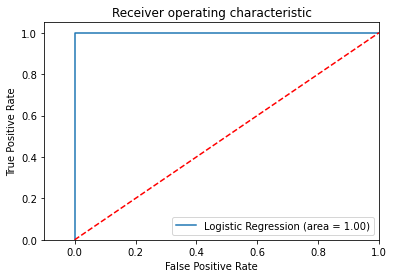

Confusion Matrix:


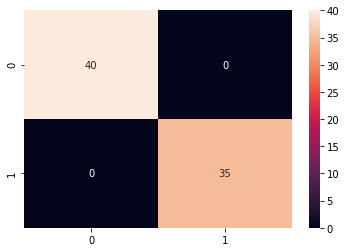

In [25]:
resultmodel(logit,x_test,y_test)

The results of the model was too good: it didn't make any mistake out of almost 75 samples when making a prediction on the test set. 


In [26]:
logit.fit(x_train, y_train)
y_pred = logit.predict(x_test)

In [27]:
print(np.unique(y_pred))

[0 1]


### 5.B Support Vector Machine

In [28]:
from sklearn.svm import SVC

In [29]:
model = SVC()
from sklearn.metrics import roc_curve, auc
def result_model(model,x_test,y_test):

    # Use the model on the testing data to predict the results
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Validation Result :")
    
    # Print the R2 score 
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Classification Report :")
    print(classification_report(y_test,y_pred))
    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, y_pred))
    
    #ROC
    
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred)

    plt.grid()

    plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend()
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    plt.title("AUC(ROC curve)")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.show()
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

### Metrices

Validation Result :
Accuracy Score :  1.0
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

R2 score:

100.00 %


Mean-squared error:

0.0


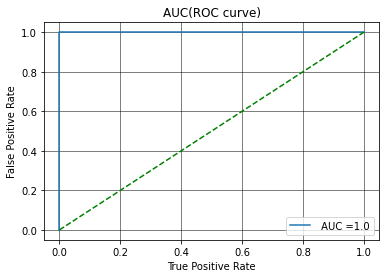

Confusion Matrix:


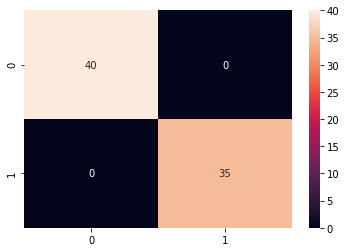

In [30]:
result_model(model,x_test,y_test)

The results of the model are quite good: it didn't  make any mistake out of almost 75 samples when making a prediction on the test set.

### 5.C Naive Bayes Classifier

In [31]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [32]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

### Metrices

Validation Result :
Accuracy Score :  1.0
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

R2 score:

100.00 %


Mean-squared error:

0.0


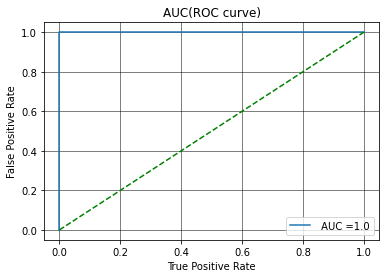

Confusion Matrix:


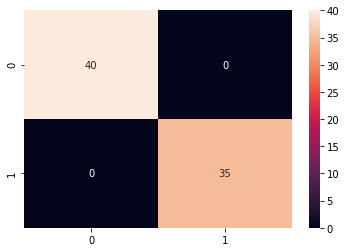

In [33]:
result_model(gnb,x_test,y_test)

The results of the model are good: it  didn't made any mistake out of almost 75 samples when making a prediction on the test set.

### 5.D. Decision Tree Classifier using Stratified Sampling

In [34]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)


In [35]:

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="gini",splitter="best" ,max_depth=5)


### Metrices

Validation Result :
Accuracy Score :  1.0
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

R2 score:

100.00 %


Mean-squared error:

0.0


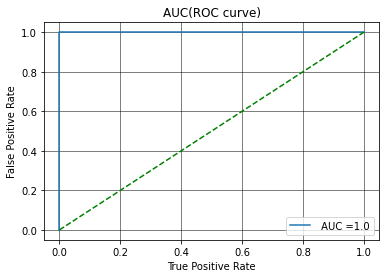

Confusion Matrix:


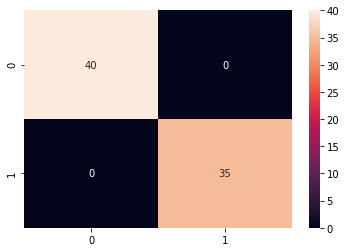

In [36]:
result_model(dtc,x_test,y_test)

### Decision Tree Visualization

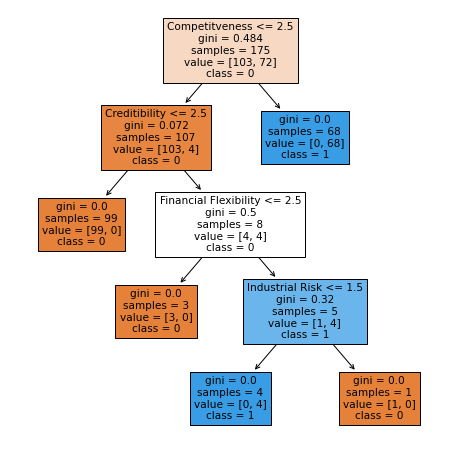

In [37]:
from sklearn import tree
feature_cols=['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Creditibility', 'Competitveness', 'Operation Risk']
fig = plt.figure(figsize=(8,8))
_ = tree.plot_tree(dtc, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig("decistion_tree_s.png")

The results of the model are very good: it didn't made any mistake out of almost 75 samples when making a prediction on the test set.

### 5.E Random Forest

In [38]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [39]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)


### Metrices

Validation Result :
Accuracy Score :  1.0
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

R2 score:

100.00 %


Mean-squared error:

0.0


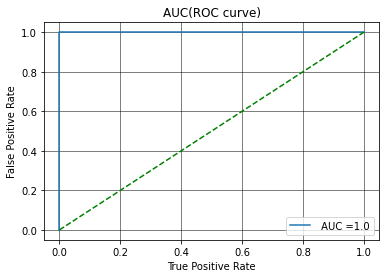

Confusion Matrix:


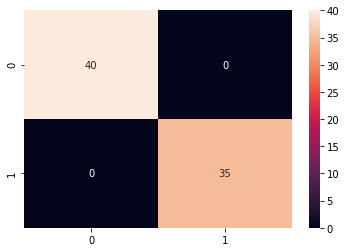

In [40]:
result_model(rf,x_test,y_test)

### Random Forest Tree Visualization

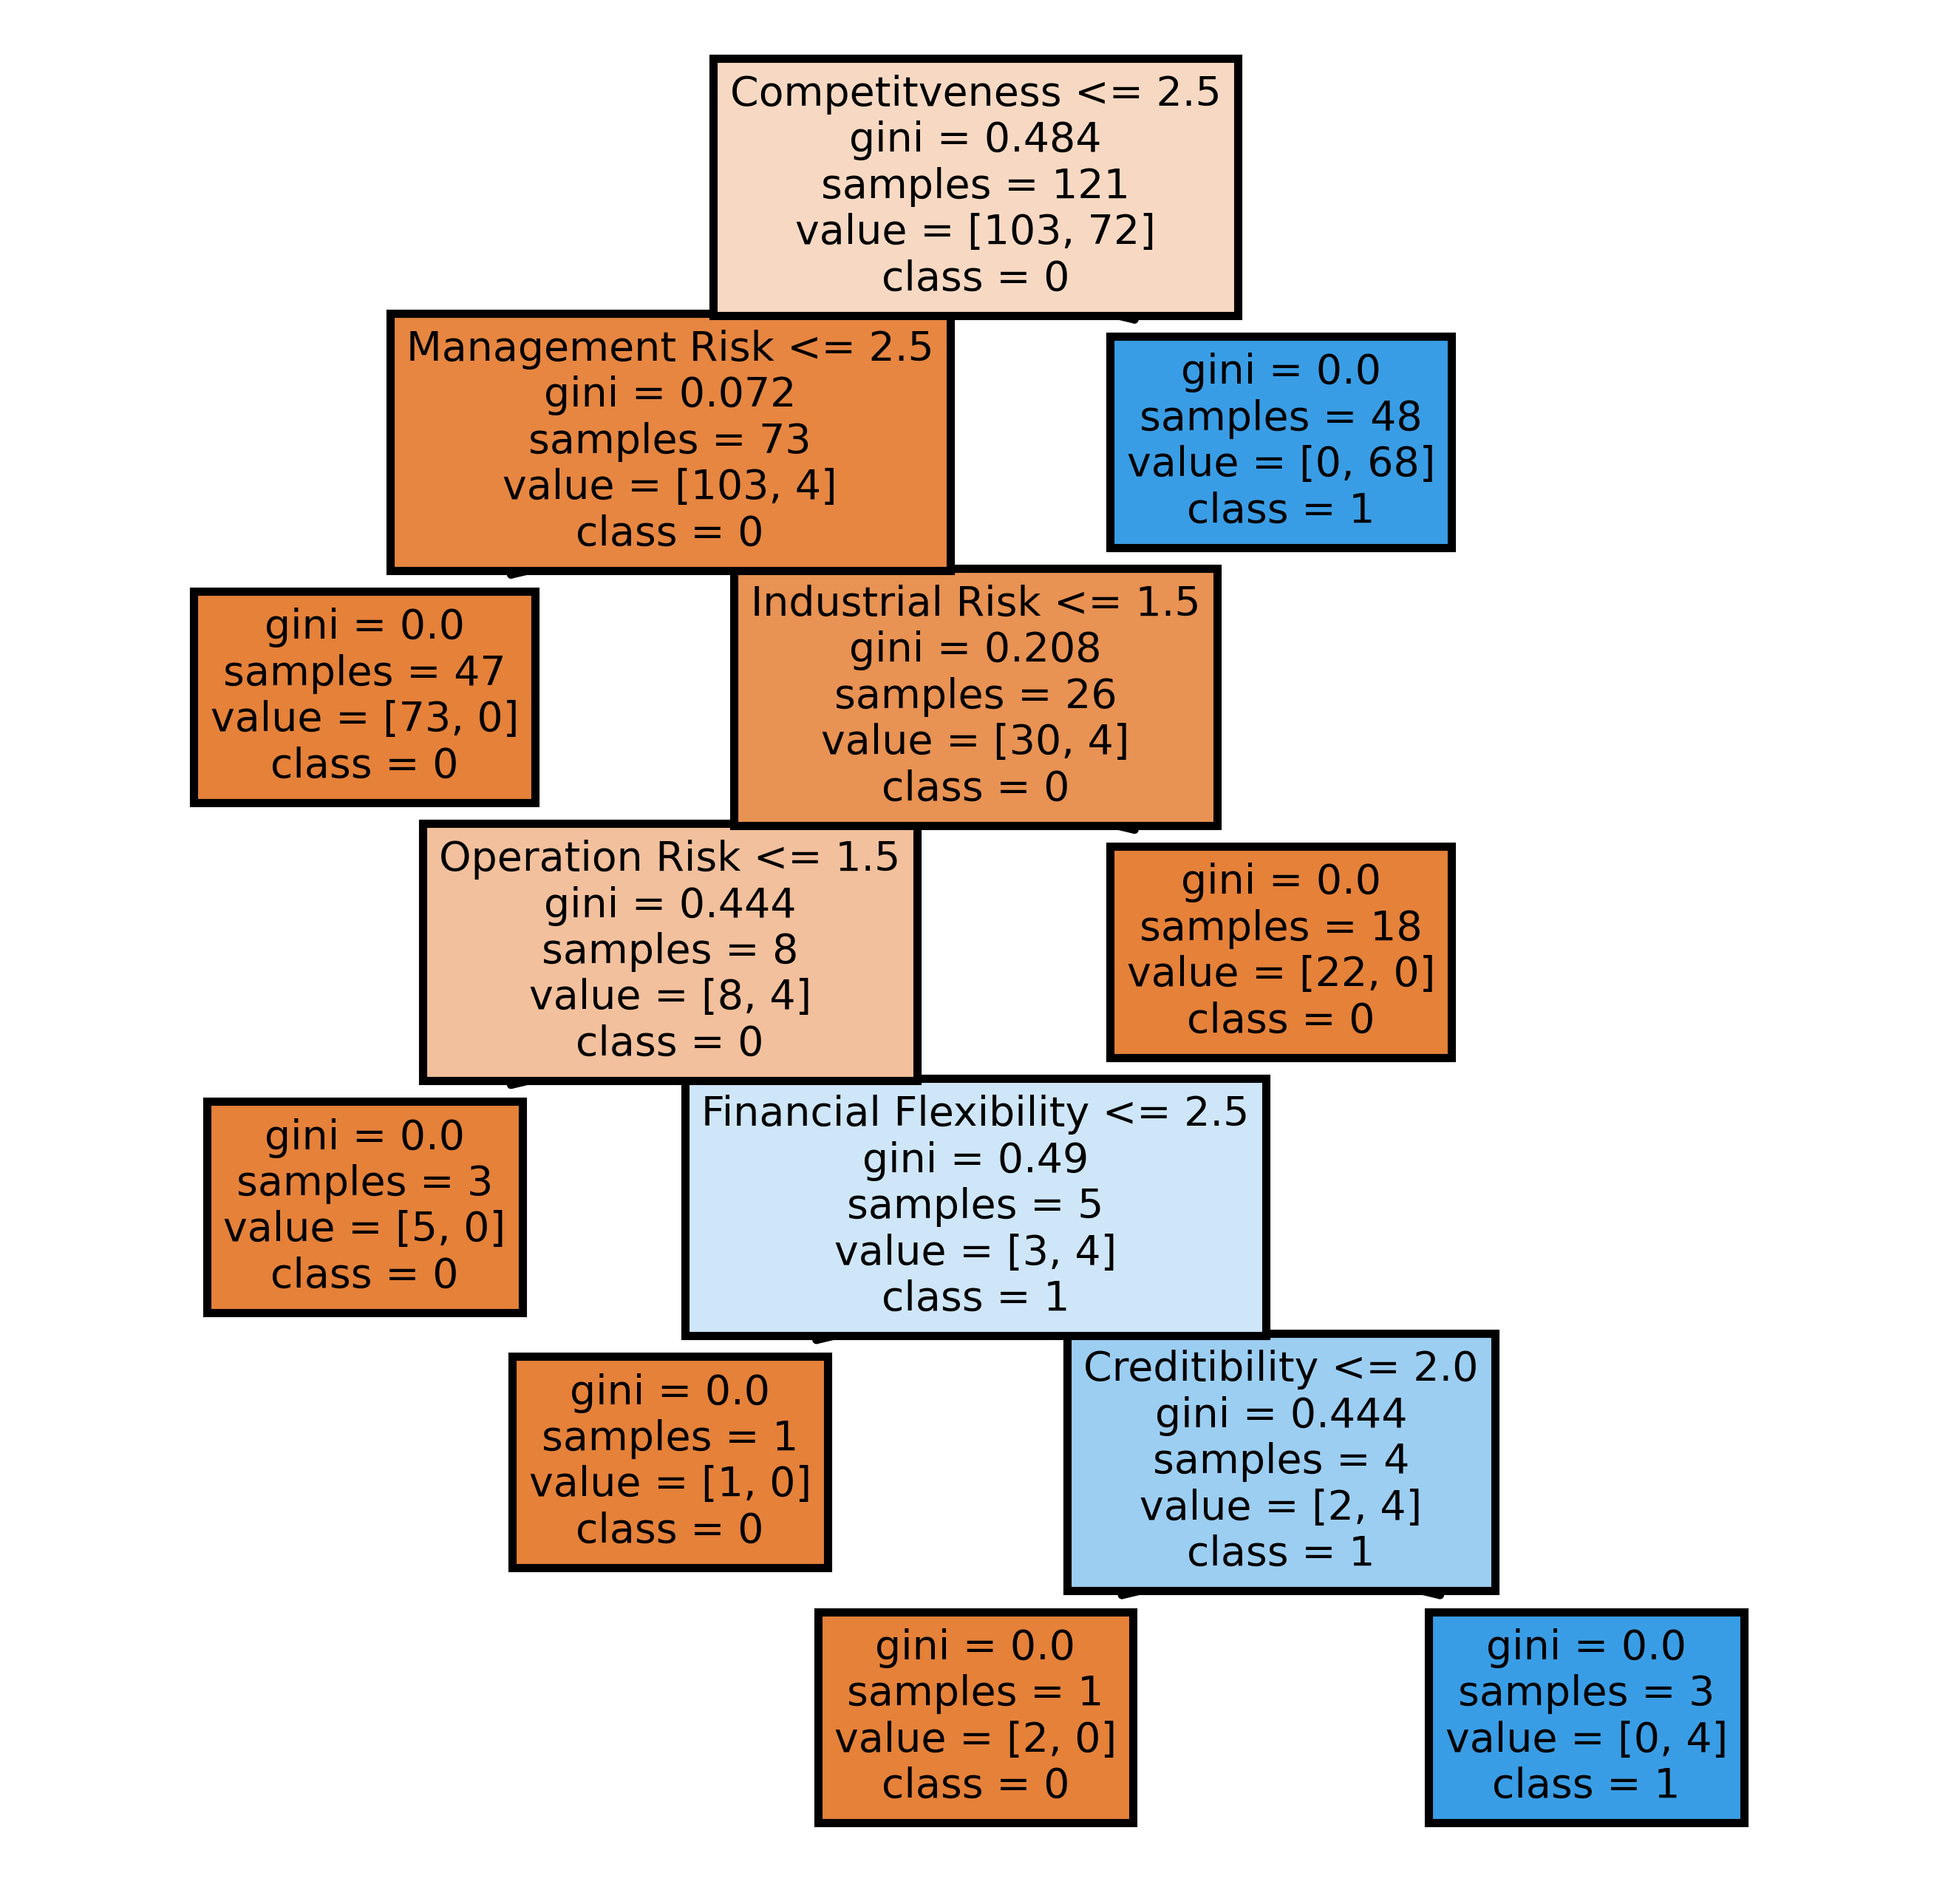

In [41]:
from sklearn import tree
feature_cols=['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Creditibility', 'Competitveness', 'Operation Risk']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = feature_cols, 
               class_names=['0','1'],
               filled = True);
fig.savefig('rf_individualtree.png')


The results of the model are too good: it  made no mistake out of almost 75 samples when making a prediction on the test set.

### 5.F Extreme Gradient Boosting classifier

In [43]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import plot_tree

In [44]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [45]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [46]:
xg_reg.fit(x_train,y_train)

xb_pred = xg_reg.predict(x_test)

[09:58:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [47]:
rmse = np.sqrt(mean_squared_error(y_test, xb_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.232861


In [48]:
predictions = [round(value) for value in xb_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [49]:
def resultmodel(model,x_test,y_test):

    # Use the model on the testing data to predict the results

    pred = model.predict(x_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, pred))
    


resultmodel(xg_reg,x_test,y_test)

R2 score:

78.21 %


Mean-squared error:

0.05422405776928888


### Report

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



### ROC Curve

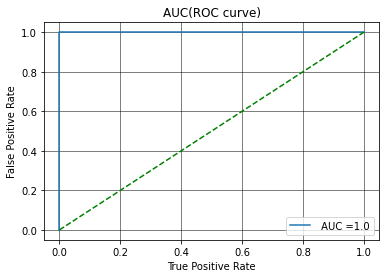

In [51]:
from sklearn.metrics import roc_curve, auc
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predictions)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Confusion Matrix

<AxesSubplot:>

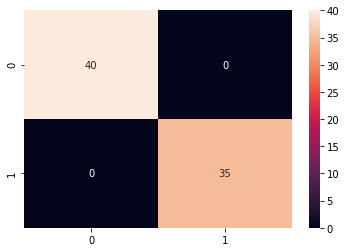

In [52]:

sns.heatmap(confusion_matrix(y_test,predictions,), annot=True)

#### Visualize Feature Importance

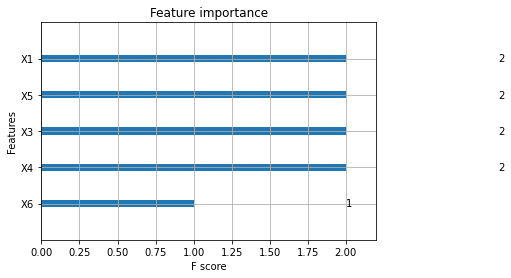

In [53]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


The results of the model are good: it not made any mistake out of almost 75 samples when making a prediction on the test set.


### 5.G Bagging Classifier

In [54]:
from sklearn.ensemble import BaggingClassifier

In [55]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [56]:
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(x_train,y_train)
bag_pred=bag_model.predict(x_test)

In [57]:
print(bag_model.score(x_test, y_test))


1.0


In [58]:
def resultmodel(model,x_test,y_test):

    # Use the model on the testing data to predict the results

    pred = model.predict(x_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, pred))
    


resultmodel(bag_model,x_test,y_test)

R2 score:

100.00 %


Mean-squared error:

0.0


### Report

In [59]:
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



### ROC Curve

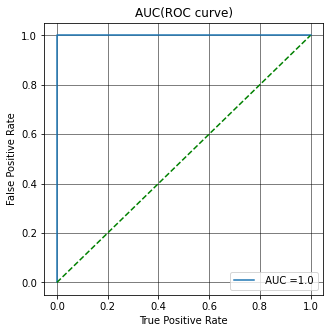

In [60]:
from sklearn.metrics import roc_curve, auc
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, bag_pred)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Confusion Matrix

<AxesSubplot:>

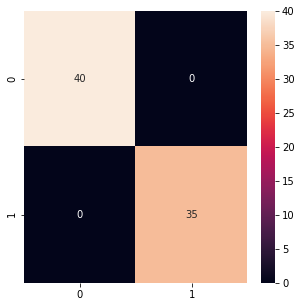

In [61]:

sns.heatmap(confusion_matrix(y_test,bag_pred,), annot=True)

#### Checking accuracy by changing base estimator

In [62]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression();
bnb = BernoulliNB()
gnb = GaussianNB()

Accuracy is 100.0%


<AxesSubplot:>

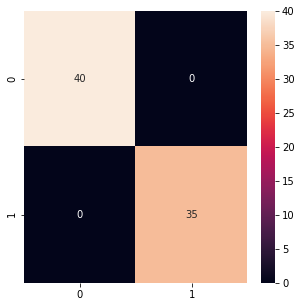

In [63]:
#LR
bag_model=BaggingClassifier(base_estimator=lr,n_estimators=100,bootstrap=True)
bag_model=bag_model.fit(x_train,y_train)
bag_pred1=bag_model.predict(x_test)
scoree=bag_model.score(x_test, y_test)
print("Accuracy is "+ str(scoree*100) + "%" )
sns.heatmap(confusion_matrix(y_test,bag_pred1,), annot=True)
 

Accuracy is 100.0%


<AxesSubplot:>

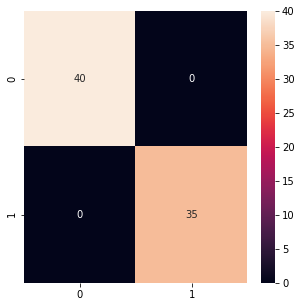

In [64]:
#GNB
bag_model=BaggingClassifier(base_estimator=gnb,n_estimators=100,bootstrap=True)
bag_model=bag_model.fit(x_train,y_train)
bag_pred=bag_model.predict(x_test)
scoree=bag_model.score(x_test, y_test)
print("Accuracy is "+ str(scoree*100) + "%" )
sns.heatmap(confusion_matrix(y_test,bag_pred,), annot=True)
 

Accuracy is 53.333333333333336%


<AxesSubplot:>

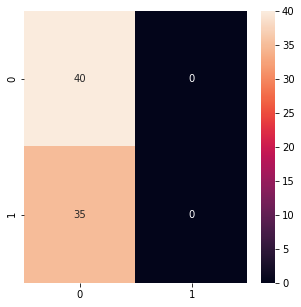

In [65]:
#BNB
bag_model=BaggingClassifier(base_estimator=bnb,n_estimators=100,bootstrap=True)
bag_model=bag_model.fit(x_train,y_train)
bag_pred=bag_model.predict(x_test)
scoree=bag_model.score(x_test, y_test)
print("Accuracy is "+ str(scoree*100) + "%" )
sns.heatmap(confusion_matrix(y_test,bag_pred,), annot=True)
 

Accuracy is 100.0%


<AxesSubplot:>

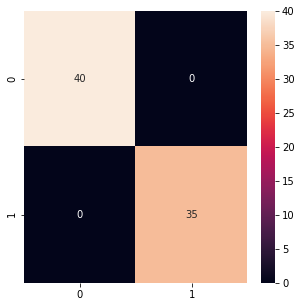

In [66]:
#LR
bag_model=BaggingClassifier(base_estimator=dtc,n_estimators=100,bootstrap=True)
bag_model=bag_model.fit(x_train,y_train)
bag_pred=bag_model.predict(x_test)
scoree=bag_model.score(x_test, y_test)
print("Accuracy is "+ str(scoree*100) + "%" )
sns.heatmap(confusion_matrix(y_test,bag_pred,), annot=True)
 

From this, we can see that Logistic regression and Decision tree are the best base for Bagging. 
For Regression Base, Bagging made 100% Accuracy


## 6. Model Analysis

In [67]:
logit = LogisticRegression(random_state= 42)
svc = SVC(random_state= 42)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(criterion="gini",splitter="best" ,max_depth=5)
rf = RandomForestClassifier(random_state= 42)


In [68]:
logit.fit(x_train,y_train)
svc.fit(x_train,y_train)
svc_predict = svc.predict(x_test)
gnb.fit(x_train,y_train)
nb_pred = gnb.predict(x_test)
dtc.fit(x_train,y_train)
dt_pred = dtc.predict(x_test)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
    

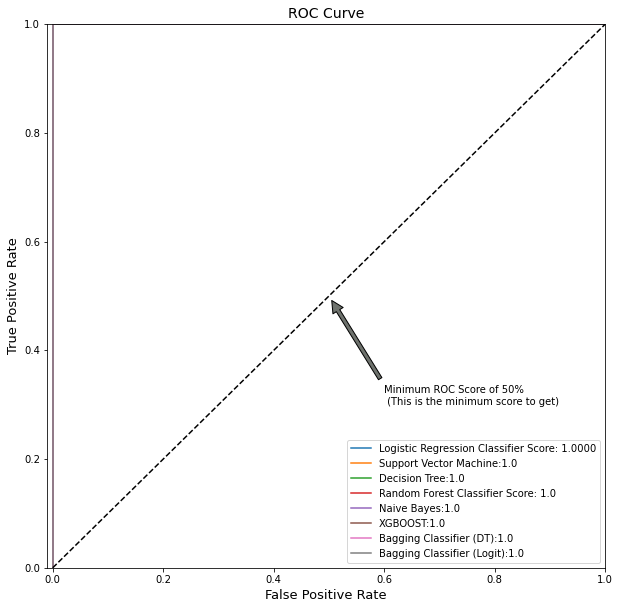

In [69]:
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logit.predict(x_test))
log_fpr, log_tpr, thresholds = roc_curve(y_test, logit.predict_proba(x_test)[:,1])
svc_fpr, svc_tpr, te_thresholds = roc_curve(y_test, svc_predict)
nb_fpr, nb_tpr, te_thresholds = roc_curve(y_test, nb_pred)
dt_fpr, dt_tpr, te_thresholds = roc_curve(y_test, dt_pred)
rf_fpr, rf_tpr, te_thresholds = roc_curve(y_test, rf_pred)
xgb_fpr, xgb_tpr, te_thresholds = roc_curve(y_test, predictions)
bag_fpr, bag_tpr, te_thresholds = roc_curve(y_test, bag_pred)
bag1_fpr, bag1_tpr, te_thresholds = roc_curve(y_test, bag_pred1)

def graph_roc_curve_multiple(log_fpr, log_tpr,svc_fpr, svc_tpr,dt_fpr, dt_tpr, rf_fpr, rf_tpr, nb_fpr, nb_tpr, xgb_fpr, xgb_tpr,bag_fpr, bag_tpr,bag1_fpr, bag1_tpr):
    plt.figure(figsize=(10,10))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, logit.predict(x_test))))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Machine:'+str(auc(svc_fpr,svc_tpr))) 
    plt.plot(dt_fpr, dt_tpr, label='Decision Tree:'+str(auc(dt_fpr,dt_tpr)) )
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: '+str(auc(rf_fpr,rf_tpr)))
    plt.plot(nb_fpr, nb_tpr, label='Naive Bayes:'+str(auc(nb_fpr,nb_tpr)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBOOST:'+str(auc(xgb_fpr,xgb_tpr)))
    plt.plot(bag_fpr, bag_tpr, label='Bagging Classifier (DT):'+str(auc(bag_fpr,bag_tpr)))
    plt.plot(bag1_fpr, bag1_tpr, label='Bagging Classifier (Logit):'+str(auc(bag1_fpr,bag1_tpr)))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr,svc_fpr, svc_tpr,dt_fpr, dt_tpr, rf_fpr, rf_tpr, nb_fpr, nb_tpr, xgb_fpr, xgb_tpr,bag_fpr, bag_tpr,bag1_fpr, bag1_tpr)
plt.show()


## 7. Ensemble Blender 

In [78]:
from numpy import hstack
from sklearn.datasets import make_classification

def get_models():
    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('svm',SVC()))
    models.append(('gnb',GaussianNB()))
    models.append(('knn', KNeighborsClassifier()))
    models.append(('cart', DecisionTreeClassifier()))
    models.append(('rf',RandomForestClassifier(n_estimators=100)))
    return models

# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for name, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict(X_val)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# define blending model
	blender = LogisticRegression()
	# fit on predictions from base models
	blender.fit(meta_X, y_val)
	return blender

# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
	# make predictions with base models
	meta_X = list()
	for name, model in models:
		# predict with base model
		yhat = model.predict(X_test)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# predict
	return blender.predict(meta_X)


In [79]:
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, x_train, x_test, y_train, y_test)
# make predictions on test set
yhat = predict_ensemble(models, blender, x_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Blending Accuracy: %.3f' % (score*100))

Blending Accuracy: 100.000


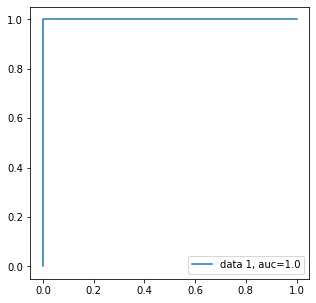

In [80]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  yhat)
auc = metrics.roc_auc_score(y_test, yhat)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


## 8. Summary

From the above analysis, we infer that <b>Qualitative Dataset</b> is very much pure.
All the Models given 100% accuracy in analysis.
From this model, Banking sector can easily classify bankruptcy from the factors.